In [2]:
import pandas as pd
df = pd.read_csv('amazon_sales_data 2025.csv')

print (df)

    Order ID      Date        Product     Category  Price  Quantity  \
0    ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1    ORD0002  20-03-25     Headphones  Electronics    100         4   
2    ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3    ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4    ORD0005  10-03-25     Smartwatch  Electronics    150         3   
..       ...       ...            ...          ...    ...       ...   
245  ORD0246  17-03-25        T-Shirt     Clothing     20         2   
246  ORD0247  30-03-25          Jeans     Clothing     40         1   
247  ORD0248  05-03-25        T-Shirt     Clothing     20         2   
248  ORD0249  08-03-25     Smartwatch  Electronics    150         3   
249  ORD0250  19-02-25     Smartphone  Electronics    500         4   

     Total Sales  Customer Name Customer Location Payment Method     Status  
0            180     Emma Clark          New York     Debit Card  Can

In [3]:
# check for missing values in each column
print(df.isnull(). sum())

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [6]:
df['Date'].head()   

0    14-03-25
1    20-03-25
2    15-02-25
3    19-02-25
4    10-03-25
Name: Date, dtype: object

In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [9]:
df.head()

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [ ]:
print(df.columns.tolist())

# What were the total and average sales per category?

In [10]:
category_sales = df.groupby('category')['total_sales'].agg(['sum', 'mean']).reset_index()
category_sales.sort_values(by='sum', ascending=False)

,category,sum,mean
2,Electronics,129950,1101.271186
4,Home Appliances,105000,2625.000000
3,Footwear,4320,160.000000
1,Clothing,3540,88.500000
0,Books,1035,41.400000


# Which product(s) generated the most revenue?

In [11]:
top_products = df.groupby('product')['total_sales'].sum().reset_index()
top_products.sort_values(by='total_sales', ascending=False).head(5)

,product,total_sales
4,Refrigerator,78000
3,Laptop,58400
6,Smartphone,48500
9,Washing Machine,27000
7,Smartwatch,15750


In [12]:
print(df['date'].head())

0    14-03-25
1    20-03-25
2    15-02-25
3    19-02-25
4    10-03-25
Name: date, dtype: object


In [21]:
df['month'] = df['date'].dt.to_period('M')

# How did sales trend over time (by Month)?

In [22]:
monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()
monthly_sales

,month,total_sales
0,2025-01,2120
1,2025-02,77610
2,2025-03,78295
3,2025-04,12715
4,2025-05,8300
5,2025-06,21120
6,2025-07,11180
7,2025-08,4765
8,2025-09,3750
9,2025-10,14930


# What is the most used payment method?

In [15]:
df['payment_method'].value_counts()

payment_method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

# What's the average quantity ordered per category?

In [16]:
df.groupby('category')['quantity'].mean().sort_values(ascending=False)

category
Electronics        2.949153
Clothing           2.875000
Books              2.760000
Home Appliances    2.750000
Footwear           2.666667
Name: quantity, dtype: float64

In [17]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Bar Chart - Total Sales per Category

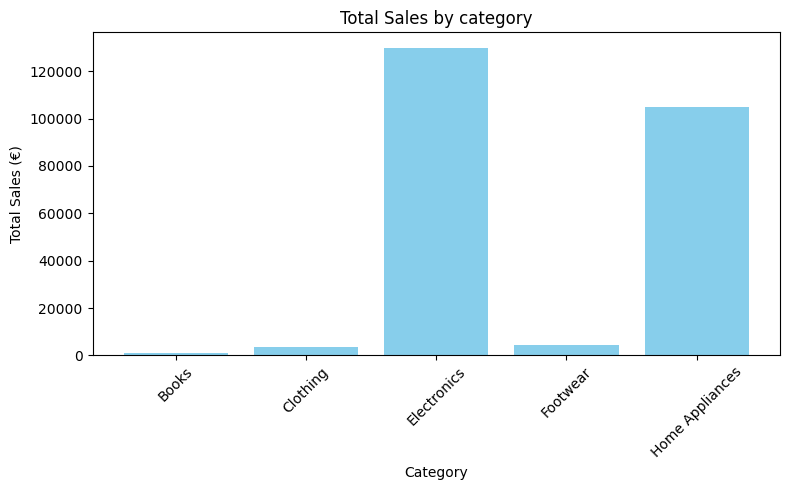

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(category_sales['category'],category_sales['sum'], color='skyblue')
plt.title('Total Sales by category')
plt.xlabel('Category')
plt.ylabel('Total Sales (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
        

# Line Chart - Monthly sales Trend

In [37]:
monthly_sales['month'] = monthly_sales['month'].astype(str)

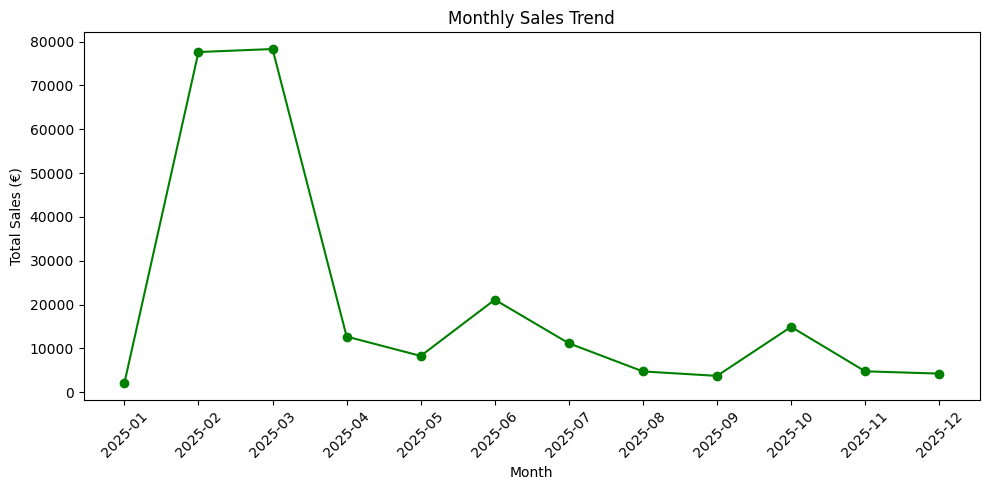

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['total_sales'], marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart - Payment Method Distribution

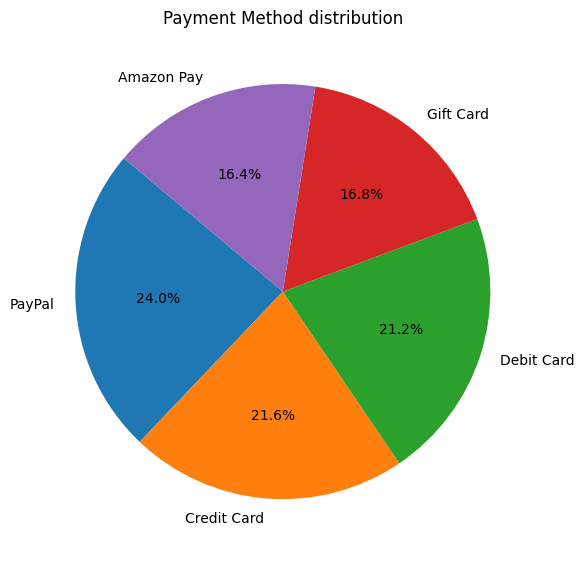

In [40]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method distribution')
plt.tight_layout()
plt.show()


# Horizonta Bar chart - Top 5 Products by Revenue

<function matplotlib.pyplot.show(close=None, block=None)>

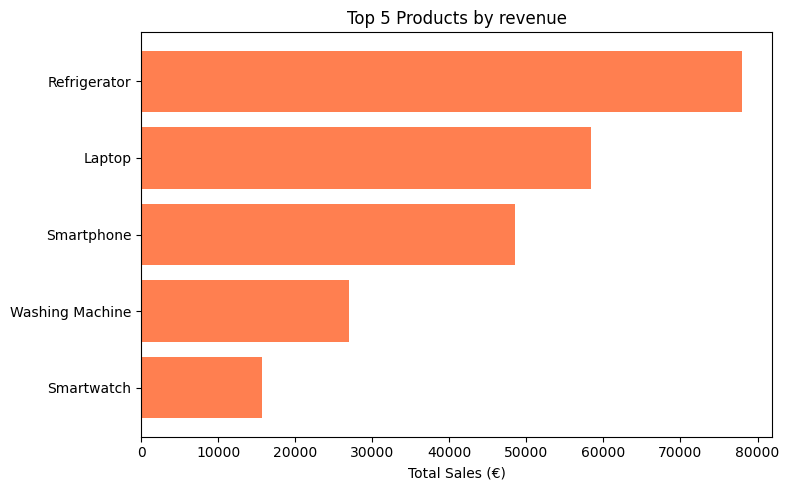

In [43]:
top_products_sorted = top_products.sort_values(by='total_sales', ascending=True).tail(5)
plt.figure(figsize=(8, 5))
plt.barh(top_products_sorted['product'], top_products_sorted['total_sales'], color='coral')
plt.title('Top 5 Products by revenue')
plt.xlabel('Total Sales (€)')
plt.tight_layout()
plt.show